In [142]:
import pandas as pd
import numpy as np
from math import sqrt
import statsmodels.api as smf
import seaborn as sns
import pymc3 as pm
%pylab inline

ModuleNotFoundError: No module named 'pymc3'

In [20]:
col_names = ['Text','Numbers']
baseline_df = pd.read_csv('baseline.csv',names=col_names)

In [22]:
baseline_df

,Text,Numbers
0,Unique cookies to view page per day:,40000.000000
1,"Unique cookies to click ""Start free trial"" per...",3200.000000
2,Enrollments per day:,660.000000
3,"Click-through-probability on ""Start free trial"":",0.080000
4,"Probability of enrolling, given click:",0.206250
5,"Probability of payment, given enroll:",0.530000
6,"Probability of payment, given click",0.109313


In [39]:
# key metric is retention rate

In [35]:
#Control data
control_df = pd.read_csv('control.csv')
control_df['CTP']=control_df.Clicks/control_df.Pageviews
control_df['Gross_Conversion']=control_df.Enrollments/control_df.Clicks
control_df['Retention']=control_df.Payments / control_df.Enrollments
control_df['Net_Conversion']=  control_df.Payments / control_df.Clicks

In [46]:
control_df_truncated = control_df.iloc[:23,:]

In [47]:
control_df_truncated

,Date,Pageviews,Clicks,Enrollments,Payments,CTP,Gross_Conversion,Retention,Net_Conversion
0,"Sat, Oct 11",7723,687,134.0,70.0,0.088955,0.195051,0.522388,0.101892
1,"Sun, Oct 12",9102,779,147.0,70.0,0.085586,0.188703,0.476190,0.089859
2,"Mon, Oct 13",10511,909,167.0,95.0,0.086481,0.183718,0.568862,0.104510
3,"Tue, Oct 14",9871,836,156.0,105.0,0.084693,0.186603,0.673077,0.125598
4,"Wed, Oct 15",10014,837,163.0,64.0,0.083583,0.194743,0.392638,0.076464
5,"Thu, Oct 16",9670,823,138.0,82.0,0.085109,0.167679,0.594203,0.099635
6,"Fri, Oct 17",9008,748,146.0,76.0,0.083037,0.195187,0.520548,0.101604
7,"Sat, Oct 18",7434,632,110.0,70.0,0.085015,0.174051,0.636364,0.110759
8,"Sun, Oct 19",8459,691,131.0,60.0,0.081688,0.189580,0.458015,0.086831
9,"Mon, Oct 20",10667,861,165.0,97.0,0.080716,0.191638,0.587879,0.112660


In [37]:
#Experiment Data
experiment_df = pd.read_csv('experiment.csv')
experiment_df['CTP']=experiment_df.Clicks/experiment_df.Pageviews
experiment_df['Gross_Conversion']=experiment_df.Enrollments/experiment_df.Clicks
experiment_df['Retention']=experiment_df.Payments / experiment_df.Enrollments
experiment_df['Net_Conversion']=  experiment_df.Payments / experiment_df.Clicks

In [49]:
experiment_df_truncated = experiment_df.iloc[:23,:]
experiment_df_truncated

,Date,Pageviews,Clicks,Enrollments,Payments,CTP,Gross_Conversion,Retention,Net_Conversion
0,"Sat, Oct 11",7716,686,105.0,34.0,0.088906,0.153061,0.323810,0.049563
1,"Sun, Oct 12",9288,785,116.0,91.0,0.084518,0.147771,0.784483,0.115924
2,"Mon, Oct 13",10480,884,145.0,79.0,0.084351,0.164027,0.544828,0.089367
3,"Tue, Oct 14",9867,827,138.0,92.0,0.083815,0.166868,0.666667,0.111245
4,"Wed, Oct 15",9793,832,140.0,94.0,0.084959,0.168269,0.671429,0.112981
5,"Thu, Oct 16",9500,788,129.0,61.0,0.082947,0.163706,0.472868,0.077411
6,"Fri, Oct 17",9088,780,127.0,44.0,0.085827,0.162821,0.346457,0.056410
7,"Sat, Oct 18",7664,652,94.0,62.0,0.085073,0.144172,0.659574,0.095092
8,"Sun, Oct 19",8434,697,120.0,77.0,0.082642,0.172166,0.641667,0.110473
9,"Mon, Oct 20",10496,860,153.0,98.0,0.081936,0.177907,0.640523,0.113953


In [ ]:
control_df['CTP']=control_df.Clicks/control_df.Pageviews

In [124]:
## EDA to see the distribution of data

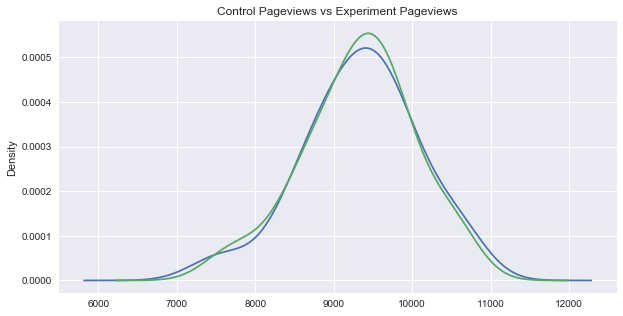

In [141]:

control_df.Pageviews.plot(kind='kde',figsize=[10,5])
experiment_df.Pageviews.plot(kind='kde',figsize=[10,5])
plt.title('Control Pageviews vs Experiment Pageviews');


In [40]:
## Frequentist test on Retention Rate between the two groups
## 95% confidence interval

In [110]:
## First hypothesis, test retention rates using pooled SE
control_retention= np.mean(control_df_truncated.Retention)
control_number_of_enrollments = int(np.sum(control_df_truncated.Enrollments))
control_number_of_payments = int(np.sum(control_df_truncated.Payments))

experiment_retention = np.mean(experiment_df_truncated.Retention)
experiment_number_of_enrollments = int(np.sum(experiment_df_truncated.Enrollments))
experiment_number_of_payments = int(np.sum(experiment_df_truncated.Payments))


In [111]:
## Next, test the differences in net conversion rates

control_net_conversion= np.mean(control_df_truncated.Net_Conversion)
control_number_of_clicks = int(np.sum(control_df_truncated.Clicks))
control_number_of_payments = int(np.sum(control_df_truncated.Payments))

experiment_retention = np.mean(experiment_df_truncated.Net_Conversion)
experiment_number_of_clicks= int(np.sum(experiment_df_truncated.Clicks))
experiment_number_of_payments = int(np.sum(experiment_df_truncated.Payments))

In [113]:
## Look at differences in CTP probability for all days

control_ctp = np.mean(control_df.CTP)
control_number_of_clicks = int(np.sum(control_df.Clicks))
control_number_of_pageviews= int(np.sum(control_df.Pageviews))

experiment_ctp = np.mean(experiment_df.CTP)
experiment_number_of_clicks= int(np.sum(experiment_df.Clicks))
experiment_number_of_pageviews = int(np.sum(experiment_df.Pageviews))

In [108]:
from math import sqrt
def two_sample_pooled_se(control_total_num,control_num_of_success,experiment_total_num,experiment_num_of_success,confidence_z=1.96):
    """Return the confidence interval for the difference in two sample proportions at 95% confidence level"""
    control_proportion = control_num_of_success/control_total_num
    experiment_proportion = experiment_num_of_success/experiment_total_num
    proportion_difference = experiment_proportion - control_proportion
    
    pooled_propotion = (experiment_num_of_success  + control_num_of_success) / \
    (experiment_total_num+control_total_num)
    
    pooled_standard_error = sqrt(pooled_propotion*(1-pooled_propotion)*\
                            (1/experiment_total_num + 1/control_total_num))
    
    print('The {} z-score confidence interval is: {:.2%} to {:.2%}'.format(confidence_z,
          proportion_difference-confidence_z*pooled_standard_error,proportion_difference+confidence_z*pooled_standard_error))
    
    

In [109]:
### FOr retention between control and experiment
two_sample_pooled_se(control_number_of_enrollments,control_number_of_payments,
                     experiment_number_of_enrollments,experiment_number_of_payments )

The 1.96 z-score confidence interval is: 0.81% to 5.41%


In [112]:
# Confidence Interval for net conversion between control and experiment

two_sample_pooled_se(control_number_of_clicks,control_number_of_payments,
                    experiment_number_of_clicks,experiment_number_of_payments)



The 1.96 z-score confidence interval is: -1.16% to 0.19%


In [114]:
## Confidence Interval for CTP between control and experiment

two_sample_pooled_se(control_number_of_pageviews,control_number_of_clicks,
                    experiment_number_of_pageviews,experiment_number_of_clicks)

The 1.96 z-score confidence interval is: -0.12% to 0.14%


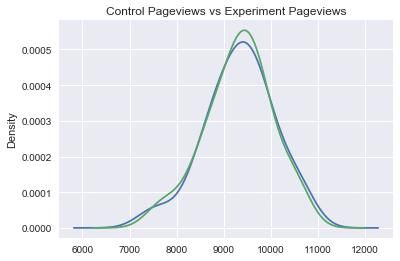

In [131]:
control_df.Pageviews.plot(kind='kde')
experiment_df.Pageviews.plot(kind='kde')
plt.title('Control Pageviews vs Experiment Pageviews')